# Inference without MCTS

In this notebook we make predictions using the trained network. We use the network by itself, without the MCT search algorithm.

In [129]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from moves_encoder import MovesEncoder
import matplotlib.pyplot as plt
from chess import Board
from util import calculate_entropy
from IPython.display import display
from predict import predict_move

##### Example board positions

**Open game:** <br> 
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1

**King's pawn game:** <br>
rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 1

**Random endgame puzzle:** <br>
8/5r1p/P5k1/K7/1P6/8/7R/8 b - - 0 1

## Prediction

Black to move


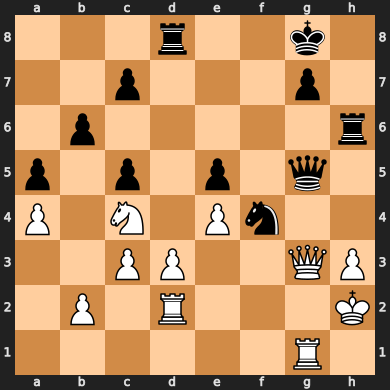

In [130]:
encoder = MovesEncoder()

position_fen = "3r2k1/2p3p1/1p5r/p1p1p1q1/P1N1Pn2/2PP2QP/1P1R3K/6R1 b - - 0 32"

board = Board(position_fen)

print("Black to move" if board.turn == 0 else "White to move")
display(board)

In [131]:
def visualize_probabilities(probabilities, sorted_classes, top_n=10):
    top_indices = sorted_classes[:top_n]
    top_probabilities = probabilities[top_indices]
    top_moves = [encoder.decode(i) for i in top_indices]

    plt.figure(figsize=(10, 5))
    plt.title(f"Move probabilities for the top {top_n} moves")
    plt.bar(range(top_n), top_probabilities)
    plt.xticks(range(top_n), top_moves)
    
    plt.text(0.95, 0.95, f'Entropy (for all probabilities): {calculate_entropy(probabilities):.2f}', 
             horizontalalignment='right', 
             verticalalignment='top', 
             transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.show()

Entropy in bits (for current position): 3.486495
Max entropy in bits: 12.169925001442312


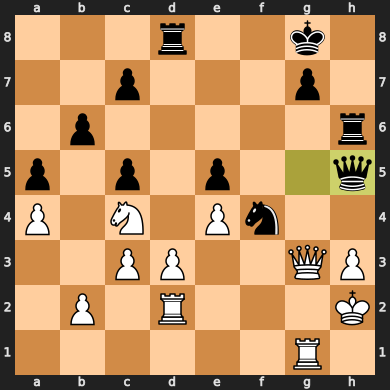

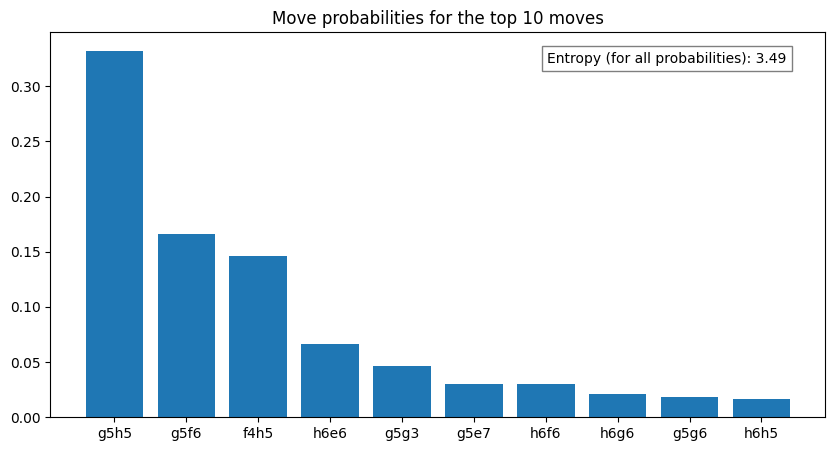

In [132]:
move, probabilities, sorted_classes = predict_move(board)

entropy = calculate_entropy(probabilities)

print('Entropy in bits (for current position):', entropy)
print('Max entropy in bits:', encoder.max_entropy)

board.push_uci(move)

display(board)

visualize_probabilities(probabilities, sorted_classes, 10)